In [ ]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Read in the data
data = pd.read_csv("/content/EURUSD Detailed Market Data As Series.csv")

In [4]:
data = data.iloc[(365*2):,:]
data.reset_index(drop=True,inplace=True)
data

Time  True Open  True High  True Low  True Close
0    2023.01.17 00:00:00    1.07876    1.08197   1.08694     1.07745
1    2023.01.18 00:00:00    1.07936    1.07879   1.08874     1.07661
2    2023.01.19 00:00:00    1.08294    1.07903   1.08401     1.07822
3    2023.01.20 00:00:00    1.08557    1.08291   1.08591     1.08024
4    2023.01.23 00:00:00    1.08715    1.08622   1.09267     1.08464
..                   ...        ...        ...       ...         ...
264  2024.08.14 00:00:00    1.10112    1.09900   1.10471     1.09793
265  2024.08.15 00:00:00    1.09712    1.10109   1.10154     1.09493
266  2024.08.16 00:00:00    1.10271    1.09709   1.10293     1.09662
267  2024.08.19 00:00:00    1.10841    1.10268   1.10861     1.10220
268  2024.08.20 00:00:00    1.11280    1.10833   1.11301     1.10717

[269 rows x 5 columns]

Text(0, 0.5, 'EURUSD Exchange Rate')

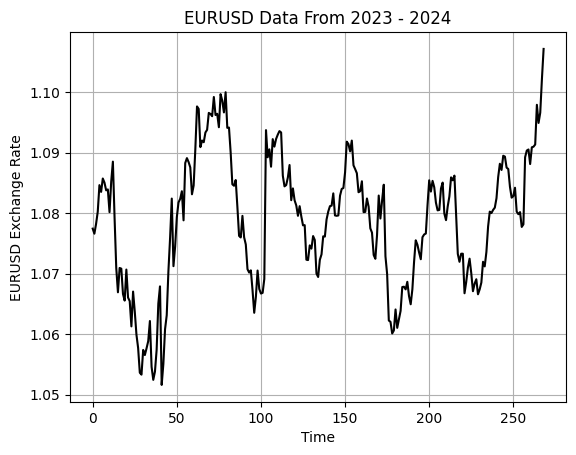

In [5]:
#Let's visualize the data
plt.plot(data['True Close'],color='black')
plt.grid()
plt.title('EURUSD Data From 2023 - 2024')
plt.xlabel('Time')
plt.ylabel('EURUSD Exchange Rate')

In [6]:
#Define a forecast horizon
HORIZON  = 1

In [ ]:
#Let us start by following classical rules
data['True Close Diff'] = data['True Close'] - data['True Close'].shift(HORIZON)
data['True Open Diff'] = data['True Open'] - data['True Open'].shift(HORIZON)
data['True High Diff'] = data['True High'] - data['True High'].shift(HORIZON)
data['True Low Diff'] = data['True Low'] - data['True Low'].shift(HORIZON)

#Add the classical target
data['Target'] = data['True Close'] - data['True Close'].shift(-HORIZON)


data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
#Predictions
data['Predictions'] = 0
data

Time  True Open  True High  True Low  True Close  \
0    2023.01.20 00:00:00    1.08557    1.08291   1.08591     1.08024   
1    2023.01.23 00:00:00    1.08715    1.08622   1.09267     1.08464   
2    2023.01.24 00:00:00    1.08879    1.08705   1.08980     1.08352   
3    2023.01.25 00:00:00    1.09147    1.08856   1.09236     1.08574   
4    2023.01.26 00:00:00    1.08917    1.09152   1.09294     1.08506   
..                   ...        ...        ...       ...         ...   
258  2024.08.09 00:00:00    1.09151    1.09177   1.09312     1.09090   
259  2024.08.12 00:00:00    1.09305    1.09146   1.09393     1.09100   
260  2024.08.13 00:00:00    1.09919    1.09292   1.09996     1.09136   
261  2024.08.14 00:00:00    1.10112    1.09900   1.10471     1.09793   
262  2024.08.15 00:00:00    1.09712    1.10109   1.10154     1.09493   

     True Close Diff  True Open Diff  True High Diff  True Low Diff   Target  \
0            0.00202         0.00263         0.00388        0.00190 -0.00440   
1            0.00440         0.00158         0.00331        0.00676  0.00112   
2           -0.00112         0.00164         0.00083       -0.00287 -0.00222   
3            0.00222         0.00268         0.00151        0.00256  0.00068   
4           -0.00068        -0.00230         0.00296        0.00058  0.00128   
..               ...             ...             ...            ...      ...   
258          0.00277        -0.00026        -0.00026       -0.00138 -0.00010   
259          0.00010         0.00154        -0.00031        0.00081 -0.00036   
260          0.00036         0.00614         0.00146        0.00603 -0.00657   
261          0.00657         0.00193         0.00608        0.00475  0.00300   
262         -0.00300        -0.00400         0.00209       -0.00317 -0.00169   

     Target 2  Predictions  Predictions 2  
0     1.08464            0              0  
1     1.08352            0              0  
2     1.08574            0              0  
3     1.08506            0              0  
4     1.08378            0              0  
..        ...          ...            ...  
258   1.09100            0              0  
259   1.09136            0              0  
260   1.09793            0              0  
261   1.09493            0              0  
262   1.09662            0              0  

[263 rows x 13 columns]

In [27]:
#Partition the data
train , test = data.iloc[:data.shape[0]//2,:] , data.iloc[data.shape[0]//2:,:]

In [28]:
#Differenced inputs
X = train.iloc[:,5:-4].columns
y = 'Target'
#Raw inputs
X2 = train.iloc[:,1:5].columns
y2 = 'Target 2'

In [50]:
#Load a machine learning library
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import root_mean_squared_error

In [ ]:
#Start the model
model   = Ridge(alpha=1e-7)

In [ ]:
model.fit(train.loc[:,X],train.loc[:,y])

Ridge(alpha=1e-07)

In [ ]:
test['Predictions'] = model.predict(test.loc[:,X])
test

/tmp/ipython-input-3013304914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(test.loc[:,X])
/tmp/ipython-input-3013304914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions 2'] = model2.predict(test.loc[:,X2])


Time  True Open  True High  True Low  True Close  \
131  2024.02.14 00:00:00    1.07257    1.07083   1.07347     1.06945   
132  2024.02.15 00:00:00    1.07714    1.07241   1.07850     1.07229   
133  2024.02.16 00:00:00    1.07769    1.07705   1.07874     1.07319   
134  2024.02.19 00:00:00    1.07782    1.07722   1.07894     1.07618   
135  2024.02.20 00:00:00    1.08068    1.07785   1.08389     1.07613   
..                   ...        ...        ...       ...         ...   
258  2024.08.09 00:00:00    1.09151    1.09177   1.09312     1.09090   
259  2024.08.12 00:00:00    1.09305    1.09146   1.09393     1.09100   
260  2024.08.13 00:00:00    1.09919    1.09292   1.09996     1.09136   
261  2024.08.14 00:00:00    1.10112    1.09900   1.10471     1.09793   
262  2024.08.15 00:00:00    1.09712    1.10109   1.10154     1.09493   

     True Close Diff  True Open Diff  True High Diff  True Low Diff   Target  \
131         -0.00057         0.00173        -0.00629       -0.00630 -0.00284   
132          0.00284         0.00457         0.00158        0.00503 -0.00090   
133          0.00090         0.00055         0.00464        0.00024 -0.00299   
134          0.00299         0.00013         0.00017        0.00020  0.00005   
135         -0.00005         0.00286         0.00063        0.00495 -0.00284   
..               ...             ...             ...            ...      ...   
258          0.00277        -0.00026        -0.00026       -0.00138 -0.00010   
259          0.00010         0.00154        -0.00031        0.00081 -0.00036   
260          0.00036         0.00614         0.00146        0.00603 -0.00657   
261          0.00657         0.00193         0.00608        0.00475  0.00300   
262         -0.00300        -0.00400         0.00209       -0.00317 -0.00169   

     Target 2  Predictions  Predictions 2  
131   1.07229    -0.001787       1.070236  
132   1.07319    -0.000905       1.073438  
133   1.07618    -0.000342       1.075215  
134   1.07613     0.001515       1.075470  
135   1.07897    -0.001130       1.076464  
..        ...          ...            ...  
258   1.09100     0.001443       1.088438  
259   1.09136    -0.000765       1.089645  
260   1.09793    -0.003057       1.093914  
261   1.09493     0.002241       1.095821  
262   1.09662     0.000452       1.093366  

[132 rows x 13 columns]

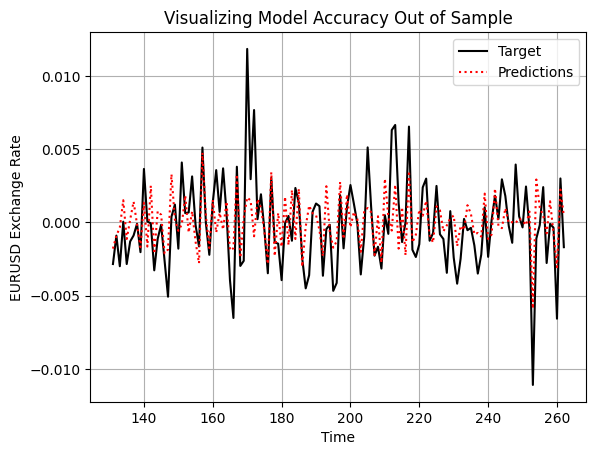

In [58]:
plt.plot(test.loc[:,'Target'],color='black')
plt.plot(test.loc[:,'Predictions'],color='red',linestyle=':')
plt.legend(['Target','Predictions'])
plt.title('Visualizing Model Accuracy Out of Sample')
plt.xlabel('Time')
plt.ylabel('EURUSD Exchange Rate')
plt.grid()

In [59]:
test.loc[:,['Target','Predictions']].corr().iloc[0,1]

np.float64(0.5826364163824712)

In [60]:
root_mean_squared_error(test['Target'],test['Predictions'])

0.002428797630367539

In [61]:
!pip install onnx skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 23.3 MB/s eta 0:00:00


In [62]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [64]:
initial_types = [("FLOAT INPUT",FloatTensorType([1,4]))]
final_types = [("FLOAT OUTPUT",FloatTensorType([1,1]))]

In [ ]:
model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [93]:
from sklearn.model_selection import RandomizedSearchCV,TimeSeriesSplit

In [94]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [95]:
nn = MLPRegressor(random_state=0,shuffle=False,early_stopping=False,max_iter=1000)

In [112]:
distributions = dict(activation=['identity','logistic','tanh','relu'],
                     alpha=[100,10,1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],
                     hidden_layer_sizes=[(4,40,20,10,2),(4,100,200,500,100,4),(4,20,40,20,4,2),(4,10,50,10,4),(4,4,4,4)],
                     solver=['adam','sgd','lbfgs'],
                     learning_rate = ['constant','invscaling','adaptive']
                     )

In [113]:
rscv = RandomizedSearchCV(nn,distributions,random_state=0,n_iter=50,n_jobs=-1,scoring='neg_mean_squared_error',cv=tscv)

In [114]:
nn_search = rscv.fit(train.loc[:,X],train.loc[:,y])

In [115]:
nn_search.best_params_

{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (4, 40, 20, 10, 2),
 'alpha': 0.0001,
 'activation': 'identity'}

In [116]:
model = MLPRegressor(random_state=0,shuffle=False,early_stopping=False,max_iter=1000,solver='lbfgs',learning_rate='adaptive',hidden_layer_sizes=(4, 40, 20, 10, 2),alpha=0.0001,activation='identity')

In [119]:
model.fit(train.loc[:,X],train.loc[:,y])

MLPRegressor(activation='identity', hidden_layer_sizes=(4, 40, 20, 10, 2),
             learning_rate='adaptive', max_iter=1000, random_state=0,
             shuffle=False, solver='lbfgs')

In [120]:
model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [121]:
onnx.save(model_proto,'EURUSD NN D1.onnx')